<a href="https://colab.research.google.com/github/NishaimLimbu/Diamond_Price_Prediction/blob/main/Dimond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("diamonds.csv")

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.shape

(53940, 10)

In [6]:
data.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
# Column	Description	Unit
# carat	Weight of the diamond	Carats (1 carat = 0.2 grams)	0.23
# cut	Quality of the cut	Categorical (e.g., Ideal, Premium)	Ideal
# color	Diamond color grade	Categorical (D = best, J = worst)	E
# clarity	Clarity grade (internal flaws)	Categorical (e.g., SI2, VVS1)	SI2
# depth	Depth as percentage of average diameter	Percentage (%)	61.5
# table	Width of table as % of average diameter	Percentage (%)	55.0
# price	Price in US dollars	USD ($)	326
# x	Length in mm	Millimeters (mm)	3.95
# y	Width in mm	Millimeters (mm)	3.98
# z	Depth in mm	Millimeters (mm)	2.43

In [9]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_map = {
    'cut': ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
}

# Create a copy of the data to avoid modifying the original
data_encoded = data.copy()

# Apply encoding
for col, order in ordinal_map.items():
    encoder = OrdinalEncoder(categories=[order])
    data_encoded[[col]] = encoder.fit_transform(data_encoded[[col]])


In [11]:
data_encoded.sample()

,carat,cut,color,clarity,depth,table,price,x,y,z
2470,0.71,2.0,5.0,4.0,61.5,57.0,3192,5.74,5.77,3.54


In [12]:
x=data_encoded.drop('price', axis=1)
y=data_encoded['price']

In [13]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  float64
 2   color    53940 non-null  float64
 3   clarity  53940 non-null  float64
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 4.1 MB


In [14]:
scaler=MinMaxScaler()
x_scaler=scaler.fit_transform(x)

In [15]:
data_encoded.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4.0,5.0,1.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.3,58.0,335,4.34,4.35,2.75


In [16]:
data_encoded.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.904097,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [18]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [19]:
y_pred=model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R2 score: ", r2)
print("Mean absolute error: ", mae)

R2 score:  0.9816780719707814
Mean absolute error:  266.17898815700175


In [20]:
average_price = y_test.mean()
relative_error = mae / average_price * 100
print(f"Relative MAE: {relative_error:.2f}%") #If relative error is low (say <10%), your model is pretty accurate.

Relative MAE: 6.81%


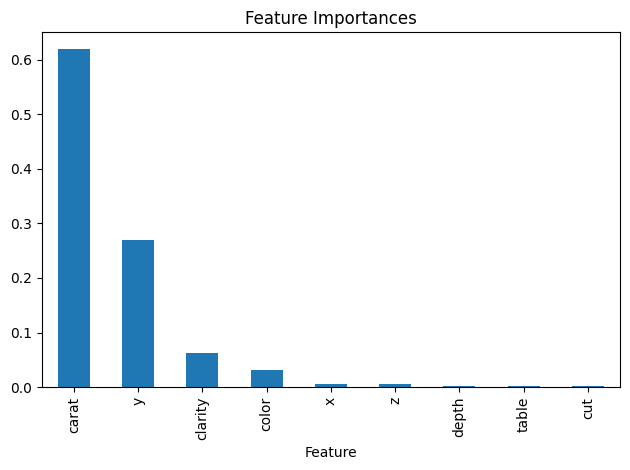

In [21]:
importances = model.feature_importances_
feature_names = x.columns
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
feat_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


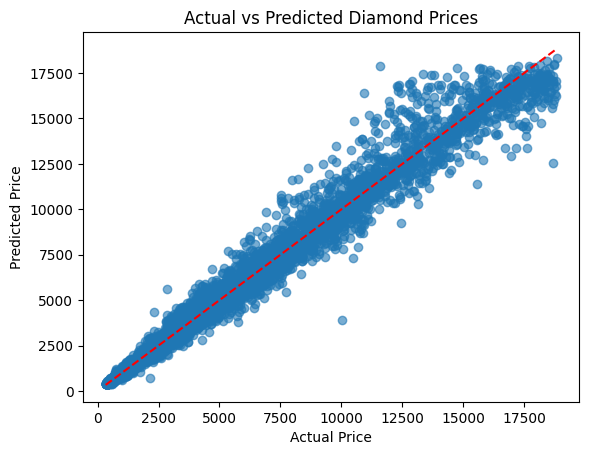

In [22]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Diamond Prices')
plt.show()


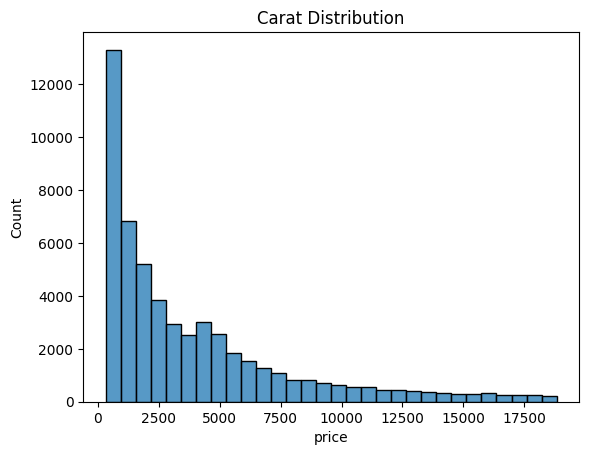

In [23]:
sns.histplot(data['price'], bins=30)
plt.title('Carat Distribution')
plt.show()

In [24]:
print (x_train.shape) # train data
print (x_test.shape) # test data

(43152, 9)
(10788, 9)


In [25]:
import joblib

joblib.dump(model, 'Diamond_Price_Prediction.pkl')

['Diamond_Price_Prediction.pkl']